In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [30]:
#READ IN THE DATA
filepath = "/users/Louis/Documents/Jupyter Notebook/Taxi_challenge/"

taxi_rides = pd.read_csv(filepath + 'cleaned_taxi_rides.csv')


In [31]:
taxi_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712075 entries, 0 to 712074
Data columns (total 28 columns):
Unnamed: 0          712075 non-null int64
VendorID            712075 non-null int64
passenger_count     712075 non-null int64
trip_distance       712075 non-null float64
RatecodeID          712075 non-null int64
PULocationID        712075 non-null int64
DOLocationID        712075 non-null int64
payment_type        712075 non-null int64
tip_amount          712075 non-null float64
total_amount        712075 non-null float64
PUborough           712075 non-null object
PUzone              712075 non-null object
PUservice_zone      712075 non-null object
DOborough           712075 non-null object
DOzone              712075 non-null object
DOservice_zone      712075 non-null object
Pickup_hour         712075 non-null int64
Pickup_day          712075 non-null int64
Dropoff_hour        712075 non-null int64
Dropoff_day         712075 non-null int64
income              712075 non-null f

In [32]:
taxi_rides = taxi_rides[taxi_rides['payment_type'] == 1]
taxi_rides = taxi_rides.drop('payment_type',axis = 1)


In [33]:
VendorID = taxi_rides.pop('VendorID')
taxi_rides['CMT'] = (VendorID == 1)*1.0
taxi_rides['VeriFone'] = (VendorID == 2)*1.0

RatecodeID = taxi_rides.pop('RatecodeID')
taxi_rides['negotiated_fare'] = (RatecodeID == 5)*1.0
taxi_rides['group_ride'] = (RatecodeID == 6)*1.0

airport = taxi_rides.pop('airport')
taxi_rides['from_airport'] = (airport == 'from')*1.0
taxi_rides['to_airport'] = (airport == 'towards')*1.0

In [34]:
corr = taxi_rides.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount,total_amount,Pickup_hour,Pickup_day,Dropoff_hour,Dropoff_day,income,trip_time,speed,tip_rate,pm,new_year,CMT,VeriFone,negotiated_fare,group_ride,from_airport,to_airport
Unnamed: 0,1,-0.00113188,0.137302,-0.0740713,-0.0572008,0.112833,0.143391,-0.0360776,0.0218858,-0.0347977,0.0227782,0.148892,0.15927,0.0437507,-0.00912422,-0.0519681,-0.0217534,0.000728093,-0.000728093,0.0161103,0.0011291,0.0693963,0.0997801
passenger_count,-0.00113188,1,0.027827,-0.00539693,-0.00342812,0.022473,0.0268019,-0.00170087,-0.0355187,-0.000998864,-0.035391,0.0261386,0.0222526,0.0271895,-0.000429762,0.00620041,0.0362118,-0.25533,0.25533,-0.000776599,-0.000748811,0.0177272,0.0179247
trip_distance,0.137302,0.027827,1,-0.115638,-0.117142,0.776012,0.962984,0.0138557,-0.0703647,0.0146429,-0.063344,0.964787,0.829663,0.730536,-0.0622765,0.00875384,0.0634336,-0.0375084,0.0375084,0.0390702,-0.00077467,0.688668,0.338012
PULocationID,-0.0740713,-0.00539693,-0.115638,1,0.0792344,-0.0886146,-0.111027,0.0339174,0.040584,0.0347051,0.0393223,-0.112298,-0.0975442,-0.0919391,0.0118077,0.033898,-0.0435161,0.00947792,-0.00947792,-0.0057404,0.00155909,-0.118062,0.00553613
DOLocationID,-0.0572008,-0.00342812,-0.117142,0.0792344,1,-0.0949714,-0.12416,0.0214052,0.0428505,0.0214539,0.0415809,-0.126584,-0.119288,-0.0781528,0.0148411,0.021451,-0.0465577,0.00775266,-0.00775266,-0.0192697,2.08588e-05,-0.0469487,-0.047586
tip_amount,0.112833,0.022473,0.776012,-0.0886146,-0.0949714,1,0.856445,0.0167178,-0.0330098,0.019253,-0.0278644,0.857834,0.695764,0.52554,0.395326,0.020069,0.0323474,-0.0269981,0.0269981,0.0570285,-0.000483911,0.554999,0.278628
total_amount,0.143391,0.0268019,0.962984,-0.111027,-0.12416,0.856445,1,0.018286,-0.0374973,0.0215536,-0.0311489,0.996614,0.862357,0.648876,0.0134304,0.02023,0.0349641,-0.0315415,0.0315415,0.0991154,-0.00122723,0.654993,0.339688
Pickup_hour,-0.0360776,-0.00170087,0.0138557,0.0339174,0.0214052,0.0167178,0.018286,1,0.209134,0.964752,0.217647,0.0173161,-0.00622273,0.00265387,-0.00723823,0.8446,-0.237065,-0.0150781,0.0150781,-0.00880801,-0.000507563,0.079435,-0.0336487
Pickup_day,0.0218858,-0.0355187,-0.0703647,0.040584,0.0428505,-0.0330098,-0.0374973,0.209134,1,0.207637,0.996396,-0.0371798,0.0433614,-0.213826,-0.0143479,0.100519,-0.860935,0.028899,-0.028899,-0.011295,0.00169046,-0.0322735,-0.0176826
Dropoff_hour,-0.0347977,-0.000998864,0.0146429,0.0347051,0.0214539,0.019253,0.0215536,0.964752,0.207637,1,0.19432,0.0203737,0.00638828,-0.0112908,-0.00758584,0.825379,-0.235002,-0.0150682,0.0150682,-0.00810187,-0.000527862,0.0741333,-0.0247209


In [35]:
#we choose our variables
X = taxi_rides[['trip_distance','CMT','from_airport','to_airport','pm','speed','total_amount','new_year','group_ride','negotiated_fare']]
y = taxi_rides[['tip_rate']]*100




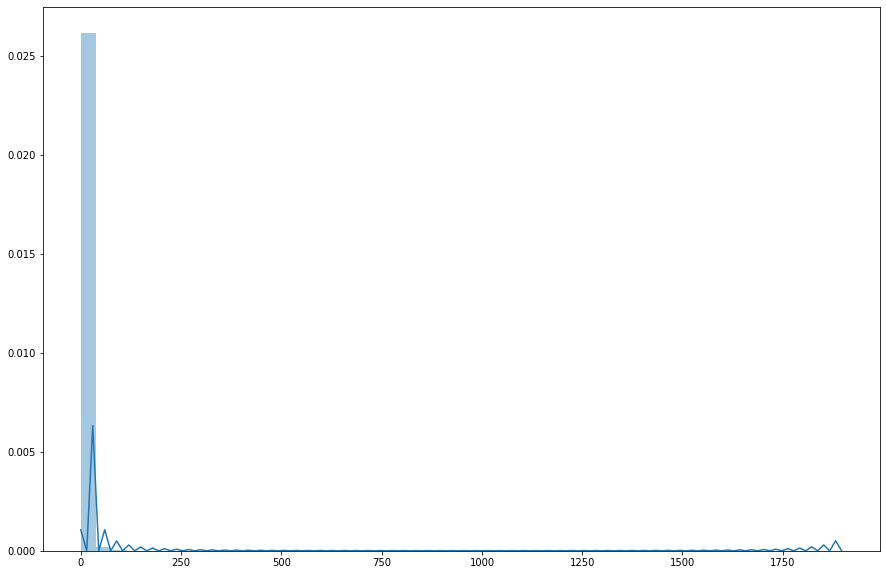

In [36]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(y)

In [37]:
y.describe()

,tip_rate
count,444642.000000
mean,19.032995
std,11.201490
min,0.000000
25%,16.504854
50%,20.000000
75%,20.000000
max,1896.551724


In [38]:
X_train = X.sample(frac=0.8,random_state=100)
X_test = X.drop(X_train.index)

y_train = y.sample(frac=0.8,random_state=100)
y_test = y.drop(y_train.index)

In [39]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
print('Intercept: \n', regressor.intercept_)

Intercept: 
 [11.36162272]


In [41]:
coef = pd.DataFrame(regressor.coef_).transpose()
col = pd.DataFrame(X.columns)
pd.concat([col, coef], axis=1)

,0,0
0,trip_distance,-3.942491
1,CMT,0.100867
2,from_airport,2.414681
3,to_airport,0.511153
4,pm,-0.219459
5,speed,0.257666
6,total_amount,0.977886
7,new_year,0.763212
8,group_ride,41.015323
9,negotiated_fare,-34.258664


In [42]:
y_pred = regressor.predict(X_test)

In [43]:
y_test = y_test['tip_rate'].reset_index(drop=True)

In [44]:
df = pd.concat([y_test, pd.DataFrame(y_pred)], axis=1)
df.head()


,tip_rate,0
0,20.000000,19.534551
1,0.000000,17.538777
2,41.666667,19.382367
3,25.060241,19.153879
4,20.000000,18.983406


In [45]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.776583766664637
Mean Squared Error: 104.31769819567491
Root Mean Squared Error: 10.213603585203163
